> This is one of the 100 recipes of the [IPython Cookbook](http://ipython-books.github.io/), the definitive guide to high-performance scientific computing and data science in Python.


# 6.4. Visualizing a NetworkX graph in the IPython notebook with d3.js

1. Let's import the packages.

In [4]:
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

2. We load a famous social graph published in 1977, called **Zachary's Karate club graph**. This graph represents the friendships between members of a Karate Club. The club's president and the instructor were involved in a dispute, resulting in a split-up of this group. Here, we simply display the graph with matplotlib (using `networkx.draw()`).

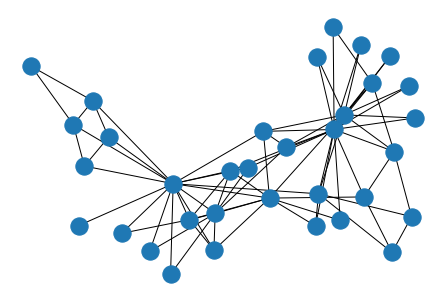

In [5]:
g = nx.karate_club_graph()
plt.figure(figsize=(6,4));
nx.draw(g)

3. Now, we're going to display this graph in the notebook with d3.js. The first step is to bring this graph to Javascript. We choose here to export the graph in JSON. Note that d3.js generally expects each edge to be an object with a `source` and a `target`. Also, we specify which side each member has taken (`club` attribute).

In [6]:
from networkx.readwrite import json_graph
data = json_graph.node_link_data(g)
with open('graph.json', 'w') as f:
    json.dump(data, f, indent=4)

4. The next step is to create an HTML object that will contain the visualization. Here, we create a `<div>` element in the notebook. We also specify a few CSS styles for nodes and links (also called edges).

In [7]:
%%html
<div id="d3-example"></div>
<style>
.node {stroke: #fff; stroke-width: 1.5px;}
.link {stroke: #999; stroke-opacity: .6;}
</style>

5. The last step is trickier. We write the Javascript code to load the graph from the JSON file, and display it with d3.js. Knowing the basics of d3.js is required here (see the documentation of d3.js). We also give detailled explanations in the code comments below. (http://d3js.org)

In [8]:
%%javascript
// We load the d3.js library from the Web.
require.config({paths: {d3: "http://d3js.org/d3.v3.min"}});
require(["d3"], function(d3) {
    // The code in this block is executed when the 
    // d3.js library has been loaded.
    
    // First, we specify the size of the canvas containing
    // the visualization (size of the <div> element).
    var width = 300,
        height = 300;

    // We create a color scale.
    var color = d3.scale.category10();

    // We create a force-directed dynamic graph layout.
    var force = d3.layout.force()
        .charge(-120)
        .linkDistance(30)
        .size([width, height]);

    // In the <div> element, we create a <svg> graphic
    // that will contain our interactive visualization.
    var svg = d3.select("#d3-example").select("svg")
    if (svg.empty()) {
        svg = d3.select("#d3-example").append("svg")
                    .attr("width", width)
                    .attr("height", height);
    }
        
    // We load the JSON file.
    d3.json("graph.json", function(error, graph) {
        // In this block, the file has been loaded
        // and the 'graph' object contains our graph.
        
        // We load the nodes and links in the force-directed
        // graph.
        force.nodes(graph.nodes)
            .links(graph.links)
            .start();

        // We create a <line> SVG element for each link
        // in the graph.
        var link = svg.selectAll(".link")
            .data(graph.links)
            .enter().append("line")
            .attr("class", "link");

        // We create a <circle> SVG element for each node
        // in the graph, and we specify a few attributes.
        var node = svg.selectAll(".node")
            .data(graph.nodes)
            .enter().append("circle")
            .attr("class", "node")
            .attr("r", 5)  // radius
            .style("fill", function(d) {
                // The node color depends on the club.
                return color(d.club); 
            })
            .call(force.drag);

        // The name of each node is the node number.
        node.append("title")
            .text(function(d) { return d.id; });

        // We bind the positions of the SVG elements
        // to the positions of the dynamic force-directed graph,
        // at each time step.
        force.on("tick", function() {
            link.attr("x1", function(d) { return d.source.x; })
                .attr("y1", function(d) { return d.source.y; })
                .attr("x2", function(d) { return d.target.x; })
                .attr("y2", function(d) { return d.target.y; });

            node.attr("cx", function(d) { return d.x; })
                .attr("cy", function(d) { return d.y; });
        });
    });
});

<IPython.core.display.Javascript object>

When we execute this cell, the HTML object created in the previous cell is updated. The graph is animated and interactive: we can click on nodes, see their labels, and move them within the canvas.

> You'll find all the explanations, figures, references, and much more in the book (to be released later this summer).

> [IPython Cookbook](http://ipython-books.github.io/), by [Cyrille Rossant](http://cyrille.rossant.net), Packt Publishing, 2014 (500 pages).